In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [26]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from random import seed,sample,randrange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [27]:
m1 = [0, 0, 0]
m2 = [0, 1, 0]
m3 = [-1, 0, 1]
m4 = [0, 0.5, 1]
cov1 = [[1, 0, 0],[0, 1, 0],[0, 0, 1]]
cov2 = [[1, 0, 1],[0, 2, 2],[1, 2, 5]]
cov3 = [[2, 0, 0],[0, 6, 0],[0, 0, 1]]
cov4 = [[2, 0, 0],[0, 1, 0],[0, 0, 3]]

In [28]:
x1=pd.DataFrame(np.random.multivariate_normal(m1, cov1, 1000),columns=list('ABC'))
x1['y']=1
x2=pd.DataFrame(np.random.multivariate_normal(m2, cov2, 1000),columns=list('ABC'))
x2['y']=2
x3=pd.DataFrame(np.random.multivariate_normal(m3, cov3, 1000),columns=list('ABC'))
x3['y']=3
x4=pd.DataFrame(np.random.multivariate_normal(m4, cov4, 1000),columns=list('ABC'))
x4['y']=4



In [29]:
data=x1
data=data.append(x2)
data=data.append(x3)
data=data.append(x4)

In [30]:
X=data.drop('y',axis=1)
y=data['y']

In [31]:
from keras.utils import to_categorical
y = to_categorical(y)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
model = Sequential()
model.add(Dense(15, input_dim=3, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(5, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [35]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 65        
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]


In [37]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, batch_size=8, verbose=1, callbacks=callback)

Train on 2680 samples, validate on 1320 samples
Epoch 1/100
2680/2680 [==============================] - 2s 773us/step - loss: 1.1397 - accuracy: 0.4899 - val_loss: 1.1106 - val_accuracy: 0.5189
Epoch 2/100
2680/2680 [==============================] - 1s 489us/step - loss: 1.0565 - accuracy: 0.5299 - val_loss: 1.0704 - val_accuracy: 0.5364
Epoch 3/100
2680/2680 [==============================] - 1s 476us/step - loss: 1.0304 - accuracy: 0.5410 - val_loss: 1.0388 - val_accuracy: 0.5356
Epoch 4/100
2680/2680 [==============================] - 1s 412us/step - loss: 1.0163 - accuracy: 0.5474 - val_loss: 1.0416 - val_accuracy: 0.5402
Epoch 5/100
2680/2680 [==============================] - 1s 463us/step - loss: 1.0143 - accuracy: 0.5414 - val_loss: 1.0599 - val_accuracy: 0.5174
Epoch 6/100
2680/2680 [==============================] - 1s 424us/step - loss: 1.0159 - accuracy: 0.5418 - val_loss: 1.0428 - val_accuracy: 0.5242
Epoch 7/100
2680/2680 [==============================] - 1s 426us/step

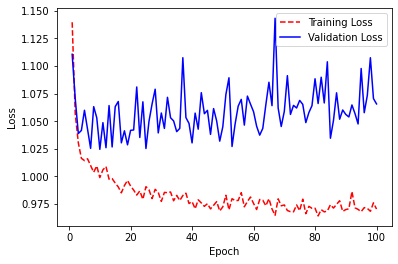

In [38]:
import matplotlib.pyplot as plt


epoch_count = range(1, len(history.history['loss']) + 1)


plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [39]:
pd.DataFrame([[0,0,0],[-0.5,-0.5,0],[-1,0,0]])

,0,1,2
0,0.0,0.0,0
1,-0.5,-0.5,0
2,-1.0,0.0,0


In [40]:
y_pred=model.predict_classes(pd.DataFrame([[0,0,0],[-0.5,-0.5,0],[-1,0,0]]))

In [41]:
y_pred

array([1, 1, 1])